In [2]:
import pandas as pd
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
from sklearn.preprocessing import StandardScaler
import numpy as np

In [3]:
master_df = pd.read_csv("master_final_merged_df_protein_gdp.csv")

### Analysis 1: PCA on different food sources

In [4]:
col_list = master_df.columns.tolist()
protein_col_list = col_list[3:19]

# Cereals is the total of others. No need to include it here 
protein_col_list.remove("Cereals")
protein_col_list_country = ["Country"]+protein_col_list

protein_group_df = master_df[protein_col_list_country]

# If Protein food group is empty. it is droped. 
df1 = protein_group_df[protein_group_df.isna().any(axis=1)]
print ("Dropped Countries:{}".format(df1["Country"]))
protein_group_df.dropna(inplace = True)

protein_group_scaled = StandardScaler().fit_transform(protein_group_df[protein_col_list])

Dropped Countries:174                             Aruba
175                            Bhutan
176                    Cayman Islands
177                      Cook Islands
178                    Czech Republic
179                    CÃ´te d'Ivoire
180       Falkland Islands (Malvinas)
181                       Isle of Man
182                            Jersey
183                            Kosovo
184                             Nauru
185              Netherlands Antilles
186    Occupied Palestinian Territory
187                       Puerto Rico
188                             Qatar
189                          RÃ©union
190                        Seychelles
191                         Singapore
192              Syrian Arab Republic
193                         Greenland
194                     Liechtenstein
Name: Country, dtype: object


C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


### PCA

In [5]:
principalComponents = pca.fit_transform(protein_group_scaled)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf["Country"] = protein_group_df["Country"]
principalDf.head()

,principal component 1,principal component 2,Country
0,-0.806632,-1.454414,Afghanistan
1,2.880997,-2.200271,Albania
2,0.821704,-2.699422,Algeria
3,-1.997533,-0.548392,Angola
4,0.899908,1.230837,Antigua and Barbuda


#### Continent Level

###### Countries to Continent 

In [6]:
# Code from https://stackoverflow.com/questions/55910004/get-continent-name-from-country-using-pycountry

from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2,country_name_to_country_alpha3,country_alpha3_to_country_alpha2

continents_dict = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU': 'Eurpoe'
}
countries = principalDf['Country'].tolist()

def convert_continents(countries):
    continents = []
    country_codes = []
    for country in countries:
        try:
            country_code = country_name_to_country_alpha3(country)
            continent = continents_dict[country_alpha2_to_continent_code(country_name_to_country_alpha2(country))]
            continents.append(continent)
            country_codes.append(country_code)
        except KeyError:
            print(country)
            continents.append(country)
            country_codes.append(country)
    return continents,country_codes

continents,country_codes = convert_continents(countries)
country_codes

Bolivia (Plurinational State of)
China, Hong Kong SAR
China, Macao SAR
China, mainland
China, Taiwan Province of
Congo (note no data in Food suppley tables for DRC)
CÃƒÂ´te d'Ivoire
Iran (Islamic Republic of)
Republic of Korea
Eswatini
North Macedonia
Timor-Leste
Venezuela (Bolivarian Republic of)


['AFG',
 'ALB',
 'DZA',
 'AGO',
 'ATG',
 'ARG',
 'ARM',
 'AUS',
 'AUT',
 'AZE',
 'BHS',
 'BGD',
 'BRB',
 'BLR',
 'BEL',
 'BLZ',
 'BEN',
 'BMU',
 'Bolivia (Plurinational State of)',
 'BIH',
 'BWA',
 'BRA',
 'BRN',
 'BGR',
 'BFA',
 'CPV',
 'KHM',
 'CMR',
 'CAN',
 'CAF',
 'TCD',
 'CHL',
 'China, Hong Kong SAR',
 'China, Macao SAR',
 'China, mainland',
 'China, Taiwan Province of',
 'COL',
 'Congo (note no data in Food suppley tables for DRC)',
 'CRI',
 "CÃƒÂ´te d'Ivoire",
 'HRV',
 'CUB',
 'CYP',
 'CZE',
 'PRK',
 'DNK',
 'DJI',
 'DMA',
 'DOM',
 'ECU',
 'EGY',
 'SLV',
 'EST',
 'ETH',
 'FJI',
 'FIN',
 'FRA',
 'PYF',
 'GAB',
 'GMB',
 'GEO',
 'DEU',
 'GHA',
 'GRC',
 'GRD',
 'GTM',
 'GIN',
 'GNB',
 'GUY',
 'HTI',
 'HND',
 'HUN',
 'ISL',
 'IND',
 'IDN',
 'Iran (Islamic Republic of)',
 'IRQ',
 'IRL',
 'ISR',
 'ITA',
 'JAM',
 'JPN',
 'JOR',
 'KAZ',
 'KEN',
 'KIR',
 'KWT',
 'KGZ',
 'LAO',
 'LVA',
 'LBN',
 'LSO',
 'LBR',
 'LTU',
 'LUX',
 'MDG',
 'MWI',
 'MYS',
 'MDV',
 'MLI',
 'MLT',
 'MRT',
 'MUS',

In [7]:
principalDf["Continent"] = continents


manual_continent_dict = {"Bolivia (Plurinational State of)":"South America"
                         ,"China, Hong Kong SAR":"Asia"
                         ,"China, mainland":"Asia"
                         ,"China, Macao SAR":"Asia"
                         ,"China, Taiwan Province of":"Asia"
                         ,"Congo (note no data in Food suppley tables for DRC)":"Africa"
                         ,"CÃƒÂ´te d'Ivoire":"Africa"
                        ,"Iran (Islamic Republic of)":"Asia"
                        ,"Republic of Korea":"Asia"
                        ,"Eswatini":"Africa"
                        ,"North Macedonia":"Europe"
                        ,"Timor-Leste":"Asia"
                        ,"Venezuela (Bolivarian Republic of)":"South America"}

manual_country_code_dict = {"Bolivia (Plurinational State of)":"BOL"
                         ,"China, Hong Kong SAR":"HKG"
                         ,"China, mainland":"CHN"
                         ,"China, Macao SAR":"MAC"
                         ,"China, Taiwan Province of":"TWN"
                         ,"Congo (note no data in Food suppley tables for DRC)":"COG"
                         ,"CÃƒÂ´te d'Ivoire":"CIV"
                        ,"Iran (Islamic Republic of)":"IRN"
                        ,"Republic of Korea":"KOR"
                        ,"Eswatini":"SWZ"
                        ,"North Macedonia":"MKD"
                        ,"Timor-Leste":"TLS"
                        ,"Venezuela (Bolivarian Republic of)":"VEN"}

principalDf["Continent"] = principalDf["Continent"].replace(manual_continent_dict)
principalDf.head()

,principal component 1,principal component 2,Country,Continent
0,-0.806632,-1.454414,Afghanistan,Asia
1,2.880997,-2.200271,Albania,Eurpoe
2,0.821704,-2.699422,Algeria,Africa
3,-1.997533,-0.548392,Angola,Africa
4,0.899908,1.230837,Antigua and Barbuda,North America


In [8]:
# Code adapted from https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/PCA/PCA_Data_Visualization_Iris_Dataset_Blog.ipynb
import matplotlib.pyplot as plt

def pca_plot(colors,df,cluster_name):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 10)
    ax.set_ylabel('Principal Component 2', fontsize = 10)
    ax.set_title('2 component PCA {}'.format(cluster_name), fontsize = 20)

    
    cluster_list = df[cluster_name].unique()
    print(cluster_list)
    for cluster, color in zip(cluster_list,colors):
        indicesToKeep = df[cluster_name] == cluster
        ax.scatter(df.loc[indicesToKeep, 'principal component 1']
               , df.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
    ax.legend(cluster_list)
    ax.grid()

['Asia' 'Eurpoe' 'Africa' 'North America' 'South America' 'Australia'
 'Europe']


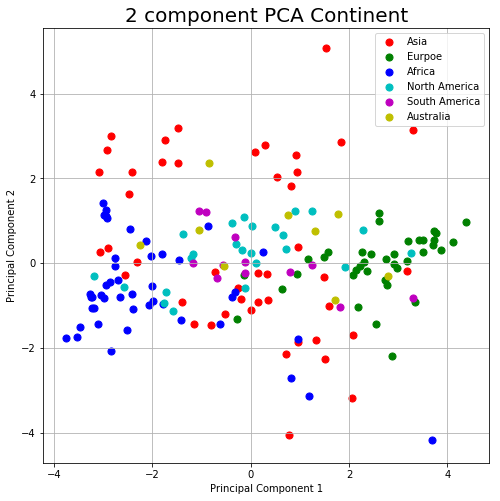

In [9]:
colors = ['r', 'g', 'b','c','m','y']
pca_plot(colors,principalDf,"Continent")

###### K means on Top of PCA (Unable to fix the legend here. Shape represents continent, and colors represent cluster)

C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\legend.py:798: UserWarning: Legend does not support 's' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\legend.py:798: UserWarning: Legend does not support 'd' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\legend.py:798: UserWarning: Legend does not support 'p' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-

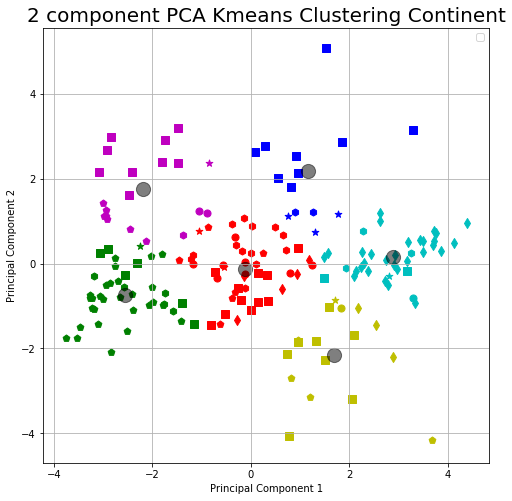

In [10]:
#K means Clustering 
# Code adapted from https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/PCA/PCA_Data_Visualization_Iris_Dataset_Blog.ipynb
from sklearn.cluster import KMeans

def perform_kmeans(X, n_clust):
    model = KMeans(n_clust)
    model.fit(X)
    cluster_labels = model.predict(X)
    cent = model.cluster_centers_
    return (cluster_labels, cent)

def pca_kmeans_plot(colors, mark_shapes,df,cluster_name,centers):
    fig_k = plt.figure(figsize = (8,8))
    ax = fig_k.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 10)
    ax.set_ylabel('Principal Component 2', fontsize = 10)
    ax.set_title('2 component PCA Kmeans Clustering {}'.format(cluster_name), fontsize = 20)

    cluster_list = df[cluster_name].unique()

    for cluster, ms in zip(cluster_list,mark_shapes):
        for kmeans_cluster,color in zip([i for i in range(len(colors))],colors):
            indicesToKeep = (df[cluster_name] == cluster) & (df["{}_Cluster".format(cluster_name)] == kmeans_cluster)
            ax.scatter(df.loc[indicesToKeep, 'principal component 1']
                   , df.loc[indicesToKeep, 'principal component 2']
                   , c = color
                   , marker = ms
                   , s = 50)

    ax.legend(mark_shapes,cluster_list)
    ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
    ax.grid()

X = principalDf[["principal component 1","principal component 2"]].values
continent_cluster_labels, continent_centers = perform_kmeans(X, 6)
principalDf["Continent_Cluster"] = continent_cluster_labels
mark_shapes = ['s','d','p','h','o','*']
colors = ['r', 'g', 'b','c','m','y']
# plt.scatter(X[:, 0], X[:, 1], c=clust_labels, s=50, cmap='viridis')
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
pca_kmeans_plot(colors,mark_shapes,principalDf,"Continent",continent_centers)

#### Region Level

###### Add Region and Development Level

In [11]:
class_df = pd.read_excel("CLASS.xls",skiprows = 4)
class_df.head()

,x,x.1,Economy,Code,X,Region,Income group,Lending category,Other
0,x,x,x,x,x,x,x,x,x
1,1,NaN,Afghanistan,AFG,NaN,South Asia,Low income,IDA,HIPC
2,2,NaN,Albania,ALB,NaN,Europe & Central Asia,Upper middle income,IBRD,NaN
3,3,NaN,Algeria,DZA,NaN,Middle East & North Africa,Upper middle income,IBRD,NaN
4,4,NaN,American Samoa,ASM,NaN,East Asia & Pacific,Upper middle income,..,NaN


In [12]:
# Convert to Country Code Alpha 3 for easier merging 
protein_group_df["Code"] = country_codes
protein_group_df["Code"].replace(manual_country_code_dict, inplace = True)
protein_group_df.head()

C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,Country,Check is addition of all commodities to right except cereals,Milk,Bovine meat,Sheep and goat meat,Pigmeat,Poultry,Eggs,Fish,Maize,Rice,Wheat,Rye,Barley,Pulses,Starchy roots,Code
0,Afghanistan,54.27,6.02,2.01,2.02,0.00,0.79,0.32,0.02,0.57,2.89,37.12,0.00,0.72,1.56,0.22,AFG
1,Albania,96.97,29.67,9.18,5.35,2.76,4.91,3.24,1.50,0.36,1.22,33.71,0.13,0.03,3.06,1.86,ALB
2,Algeria,80.74,13.78,2.18,2.70,0.00,2.30,2.09,1.23,3.09,0.50,43.03,0.00,2.61,4.55,2.67,DZA
3,Angola,48.44,1.02,3.27,0.44,2.34,5.55,0.51,4.14,8.80,1.55,8.46,0.00,0.00,5.23,7.13,AGO
4,Antigua and Barbuda,72.94,12.22,5.39,0.60,3.26,18.59,1.30,13.11,0.39,2.15,13.39,0.00,0.00,1.66,0.86,ATG


In [13]:
protein_group_merged_df = protein_group_df.merge(class_df,how= "left", on="Code")
protein_group_merged_df.head()

,Country,Check is addition of all commodities to right except cereals,Milk,Bovine meat,Sheep and goat meat,Pigmeat,Poultry,Eggs,Fish,Maize,...,Starchy roots,Code,x,x.1,Economy,X,Region,Income group,Lending category,Other
0,Afghanistan,54.27,6.02,2.01,2.02,0.00,0.79,0.32,0.02,0.57,...,0.22,AFG,1,NaN,Afghanistan,NaN,South Asia,Low income,IDA,HIPC
1,Albania,96.97,29.67,9.18,5.35,2.76,4.91,3.24,1.50,0.36,...,1.86,ALB,2,NaN,Albania,NaN,Europe & Central Asia,Upper middle income,IBRD,NaN
2,Algeria,80.74,13.78,2.18,2.70,0.00,2.30,2.09,1.23,3.09,...,2.67,DZA,3,NaN,Algeria,NaN,Middle East & North Africa,Upper middle income,IBRD,NaN
3,Angola,48.44,1.02,3.27,0.44,2.34,5.55,0.51,4.14,8.80,...,7.13,AGO,6,NaN,Angola,NaN,Sub-Saharan Africa,Lower middle income,IBRD,NaN
4,Antigua and Barbuda,72.94,12.22,5.39,0.60,3.26,18.59,1.30,13.11,0.39,...,0.86,ATG,7,NaN,Antigua and Barbuda,NaN,Latin America & Caribbean,High income,IBRD,NaN


In [14]:
principalDf["Income group"] = protein_group_merged_df["Income group"]
principalDf["Region"] = protein_group_merged_df["Region"]
# master_merged_df.head()
principalDf.head()

,principal component 1,principal component 2,Country,Continent,Continent_Cluster,Income group,Region
0,-0.806632,-1.454414,Afghanistan,Asia,0,Low income,South Asia
1,2.880997,-2.200271,Albania,Eurpoe,5,Upper middle income,Europe & Central Asia
2,0.821704,-2.699422,Algeria,Africa,5,Upper middle income,Middle East & North Africa
3,-1.997533,-0.548392,Angola,Africa,1,Lower middle income,Sub-Saharan Africa
4,0.899908,1.230837,Antigua and Barbuda,North America,2,High income,Latin America & Caribbean


['South Asia' 'Europe & Central Asia' 'Middle East & North Africa'
 'Sub-Saharan Africa' 'Latin America & Caribbean' 'East Asia & Pacific'
 'North America']


C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\legend.py:798: UserWarning: Legend does not support 's' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\legend.py:798: UserWarning: Legend does not support 'd' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\legend.py:798: UserWarning: Legend does not support 'p' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-

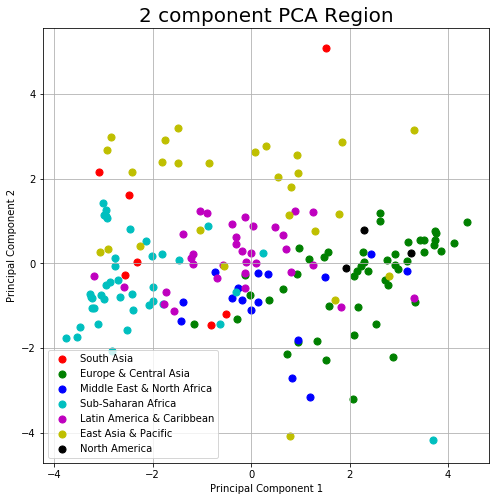

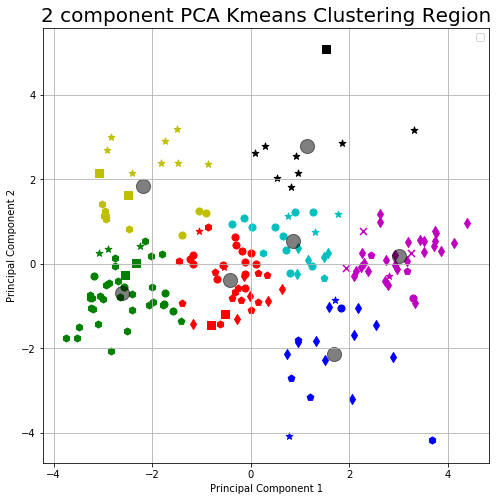

In [15]:

colors_region = ['r', 'g', 'b','c','m','y','k']
pca_plot(colors_region,principalDf,"Region")

region_cluster_labels, region_centers = perform_kmeans(X, 7)
principalDf["Region_Cluster"] = region_cluster_labels
mark_shapes = ['s','d','p','h','o','*','x']

pca_kmeans_plot(colors_region,mark_shapes,principalDf,"Region",region_centers)

['Low income' 'Upper middle income' 'Lower middle income' 'High income']


C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\legend.py:798: UserWarning: Legend does not support 's' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\legend.py:798: UserWarning: Legend does not support 'd' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\legend.py:798: UserWarning: Legend does not support 'p' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-

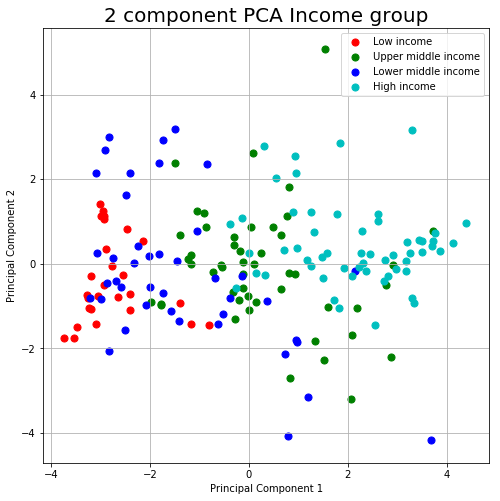

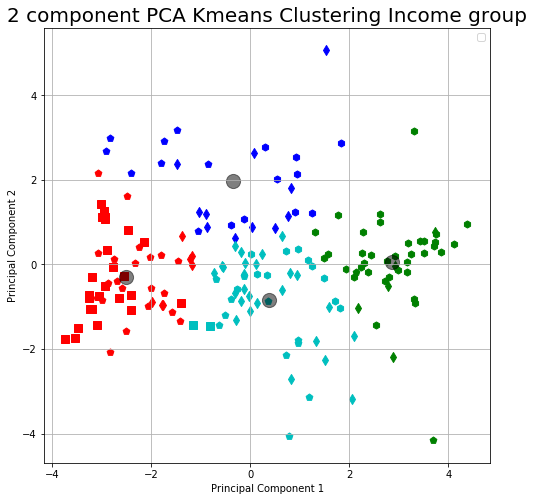

In [16]:
colors_income = ['r', 'g', 'b','c']
pca_plot(colors_income,principalDf,"Income group")
mark_shapes_income = ['s','d','p','h']
income_cluster_labels, income_centers = perform_kmeans(X, 4)
principalDf["Income group_Cluster"] = income_cluster_labels


pca_kmeans_plot(colors_income,mark_shapes_income,principalDf,"Income group",income_centers)

principalDf.to_csv("pca.csv")

In [47]:
%%HTML
<script type='text/javascript' src='https://us-east-1.online.tableau.com/javascripts/api/viz_v1.js'></script><div class='tableauPlaceholder' style='width: 1280px; height: 834px;'><object class='tableauViz' width='1280' height='834' style='display:none;'><param name='host_url' value='https%3A%2F%2Fus-east-1.online.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='&#47;t&#47;trainingdata' /><param name='name' value='PCAKmeansPlot&#47;Sheet1' /><param name='tabs' value='yes' /><param name='toolbar' value='yes' /><param name='showAppBanner' value='false' /><param name='filter' value='iframeSizedToWindow=true' /></object></div>

### Analysis 2: PCA on protein foods + GDP + Urban/Rural ratio + permanerent crops ratio 

###### Prepare Dataset

In [18]:
protein_group_merged_df['Bovine_Sheep_Pigmeat_Poultry'] = protein_group_merged_df['Bovine meat']+protein_group_merged_df['Sheep and goat meat']+protein_group_merged_df['Pigmeat']+protein_group_merged_df['Poultry']
protein_group_merged_df['Milk_Egg'] = protein_group_merged_df['Milk']+protein_group_merged_df['Eggs']
protein_group_merged_master_df = protein_group_merged_df.merge(master_df,how="left",on="Country")
protein_group_merged_master_df['Urban_Rural_ratio'] = protein_group_merged_master_df["Urban population"]/protein_group_merged_master_df["Rural population"]
protein_group_merged_master_df['Permenent_Crops_Ratio'] = protein_group_merged_master_df['Permanent crops area']/ protein_group_merged_master_df['Total area of the country (excl. coastal waters)']
protein_group_merged_final_master_df = protein_group_merged_master_df.merge(principalDf,how="left",on ="Country")
socio_cols = ['Bovine_Sheep_Pigmeat_Poultry','Cereals','Milk_Egg','Fish_x'
              ,' Av 2011+2012+2013 extracted from WDI (constant 2010 US$)'
              ,'Urban_Rural_ratio','Permenent_Crops_Ratio']

country_cols = ['Country','Code','Income group_y','Region_y','Continent']

desired_cols = socio_cols + country_cols

socio_pca_df = protein_group_merged_final_master_df[desired_cols]
# socio_pca_df.rename({"Income group_y":"Income group","Fish_x":"Fish","Region_y":"Region"},axis = 1,inplace = True)
socio_pca_df.head()

,Bovine_Sheep_Pigmeat_Poultry,Cereals,Milk_Egg,Fish_x,Av 2011+2012+2013 extracted from WDI (constant 2010 US$),Urban_Rural_ratio,Permenent_Crops_Ratio,Country,Code,Income group_y,Region_y,Continent
0,4.82,41.39,6.34,0.02,572.815028,0.328817,0.001838,Afghanistan,AFG,Low income,South Asia,Asia
1,22.20,35.48,32.91,1.50,4271.534293,1.429285,0.026748,Albania,ALB,Upper middle income,Europe & Central Asia,Eurpoe
2,7.18,49.25,15.87,1.23,4555.191581,2.395336,0.003880,Algeria,DZA,Upper middle income,Middle East & North Africa,Africa
3,11.60,19.00,1.53,4.14,3709.969541,0.528939,0.002326,Angola,AGO,Lower middle income,Sub-Saharan Africa,Africa
4,27.84,16.60,13.52,13.11,11929.279270,0.300981,0.022727,Antigua and Barbuda,ATG,High income,Latin America & Caribbean,North America


In [19]:
# Missing Values 
socio_pca_df[pd.isnull(socio_pca_df).any(axis=1)]

,Bovine_Sheep_Pigmeat_Poultry,Cereals,Milk_Egg,Fish_x,Av 2011+2012+2013 extracted from WDI (constant 2010 US$),Urban_Rural_ratio,Permenent_Crops_Ratio,Country,Code,Income group_y,Region_y,Continent
17,38.51,14.63,12.07,12.40,82266.93602,NaN,NaN,Bermuda,BMU,High income,North America,North America
32,48.46,19.07,13.34,17.38,34325.77821,NaN,NaN,"China, Hong Kong SAR",HKG,High income,East Asia & Pacific,Asia
33,34.35,18.57,9.42,15.11,66970.48546,NaN,NaN,"China, Macao SAR",MAC,High income,East Asia & Pacific,Asia
35,25.05,22.13,7.63,8.98,NaN,NaN,NaN,"China, Taiwan Province of",TWN,High income,East Asia & Pacific,Asia
44,2.55,27.69,1.78,2.58,NaN,1.513552,0.019081,Democratic People's Republic of Korea,PRK,Low income,East Asia & Pacific,Asia
46,6.57,37.06,4.65,1.01,NaN,3.036647,0.000000,Djibouti,DJI,Lower middle income,Middle East & North Africa,Africa
57,34.92,20.25,11.51,13.29,NaN,NaN,NaN,French Polynesia,PYF,High income,East Asia & Pacific,Australia
112,27.44,22.12,14.43,7.40,NaN,NaN,NaN,New Caledonia,NCL,High income,East Asia & Pacific,Australia
127,12.77,28.02,16.60,3.63,NaN,0.630905,0.087149,Republic of Moldova,MDA,Lower middle income,Europe & Central Asia,Eurpoe
153,12.46,27.89,15.76,1.43,NaN,1.370286,0.014002,North Macedonia,MKD,Upper middle income,Europe & Central Asia,Europe


In [45]:
socio_pca_dropped_df = socio_pca_df.dropna()
socio_scaled = StandardScaler().fit_transform(socio_pca_dropped_df[socio_cols])
socio_scaled[1]

array([ 0.59811036,  0.72640358,  2.25214871, -0.64372031, -0.47708471,
       -0.26942688, -0.14806678])

###### PCA

In [21]:
principalComponents_socio = pca.fit_transform(socio_scaled)

principalDf_socio = pd.DataFrame(data = principalComponents_socio
             , columns = ['principal component 1', 'principal component 2'])
principalDf_socio["Country"] = socio_pca_dropped_df["Country"]
principalDf_socio["Continent"] = socio_pca_dropped_df["Continent"]
principalDf_socio["Income group"] = socio_pca_dropped_df["Income group_y"]
principalDf_socio["Region"] = socio_pca_dropped_df["Region_y"]
X_socio = principalDf_socio[["principal component 1","principal component 2"]].values
principalDf_socio.head()

,principal component 1,principal component 2,Country,Continent,Income group,Region
0,-1.697410,-1.543451,Afghanistan,Asia,Low income,South Asia
1,0.936540,-1.201689,Albania,Eurpoe,Upper middle income,Europe & Central Asia
2,-0.844069,-2.055723,Algeria,Africa,Upper middle income,Middle East & North Africa
3,-1.081889,0.334796,Angola,Africa,Lower middle income,Sub-Saharan Africa
4,0.844759,1.377859,Antigua and Barbuda,North America,High income,Latin America & Caribbean


#### Continent Level

['Asia' 'Eurpoe' 'Africa' 'North America' 'South America' 'Australia' nan]


C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\legend.py:798: UserWarning: Legend does not support 's' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\legend.py:798: UserWarning: Legend does not support 'd' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\legend.py:798: UserWarning: Legend does not support 'p' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-

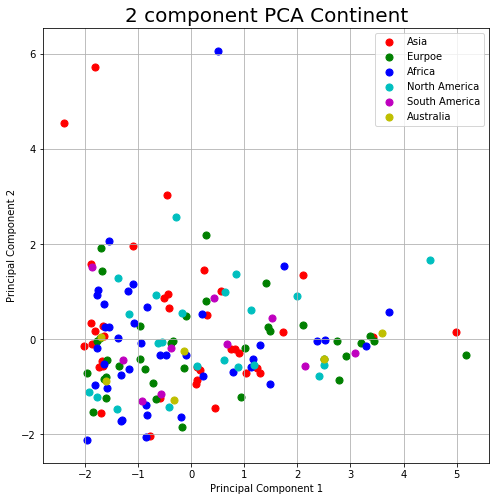

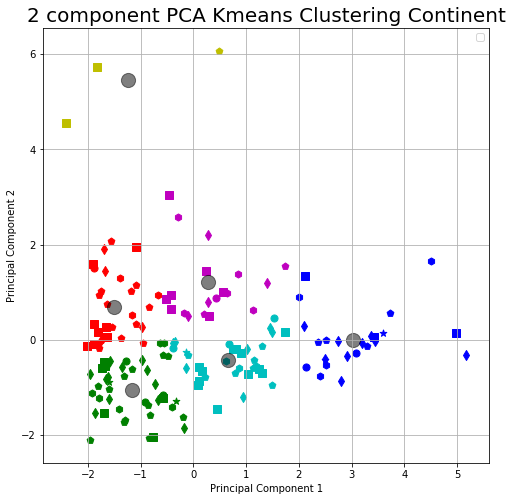

In [22]:
colors_region = ['r', 'g', 'b','c','m','y']
pca_plot(colors_region,principalDf_socio,"Continent")

region_cluster_labels_socio, region_centers_socio = perform_kmeans(X_socio, 6)
principalDf_socio["Continent_Cluster"] = region_cluster_labels_socio
mark_shapes = ['s','d','p','h','o','*','x']

pca_kmeans_plot(colors_region,mark_shapes,principalDf_socio,"Continent",region_centers_socio)

#### Region Level 

['South Asia' 'Europe & Central Asia' 'Middle East & North Africa'
 'Sub-Saharan Africa' 'Latin America & Caribbean' 'East Asia & Pacific'
 nan 'North America']


C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\legend.py:798: UserWarning: Legend does not support 's' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\legend.py:798: UserWarning: Legend does not support 'd' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\legend.py:798: UserWarning: Legend does not support 'p' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-

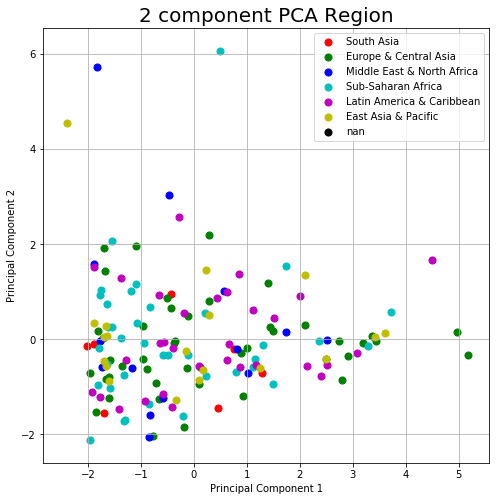

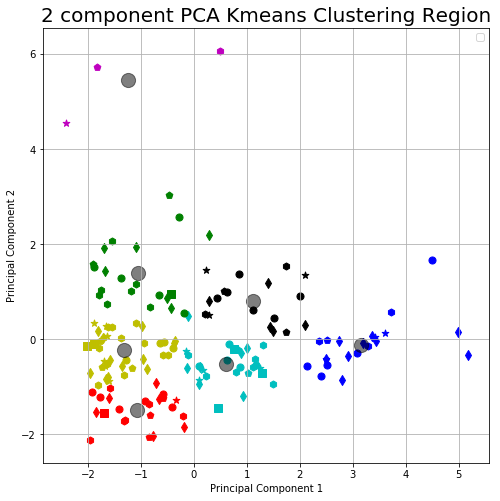

In [23]:
colors_region = ['r', 'g', 'b','c','m','y','k']
pca_plot(colors_region,principalDf_socio,"Region")

region_cluster_labels_socio, region_centers_socio = perform_kmeans(X_socio, 7)
principalDf_socio["Region_Cluster"] = region_cluster_labels_socio
mark_shapes = ['s','d','p','h','o','*','x']

pca_kmeans_plot(colors_region,mark_shapes,principalDf_socio,"Region",region_centers_socio)

#### Development Level

['Low income' 'Upper middle income' 'Lower middle income' 'High income'
 nan]


C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\legend.py:798: UserWarning: Legend does not support 's' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\legend.py:798: UserWarning: Legend does not support 'd' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\legend.py:798: UserWarning: Legend does not support 'p' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-

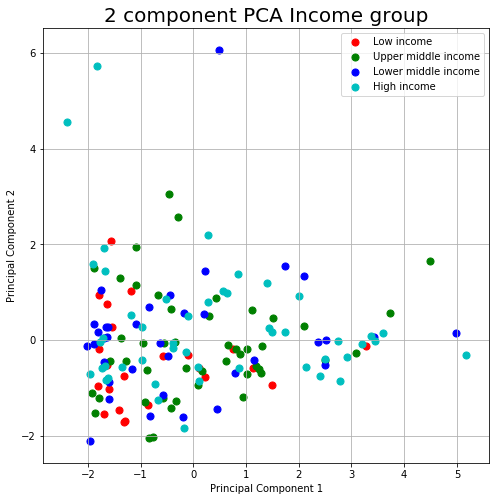

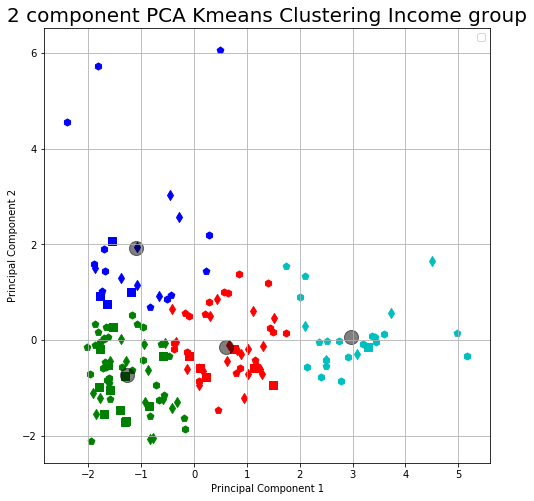

In [94]:
colors_region = ['r', 'g', 'b','c']
pca_plot(colors_region,principalDf_socio,"Income group")

region_cluster_labels_socio, region_centers_socio = perform_kmeans(X_socio, 4)
principalDf_socio["Income group_Cluster"] = region_cluster_labels_socio
mark_shapes = ['s','d','p','h']

pca_kmeans_plot(colors_region,mark_shapes,principalDf_socio,"Income group",region_centers_socio)

### Analysis 3 Only Protein Sources(Grouped)

In [38]:
grouped_food_df = socio_pca_df[["Bovine_Sheep_Pigmeat_Poultry","Cereals","Milk_Egg","Fish_x"
                                ,"Country","Code","Income group_y","Region_y","Continent"]]

protein_cols = ["Bovine_Sheep_Pigmeat_Poultry","Cereals","Milk_Egg","Fish_x"]
grouped_food_df.head()
grouped_food_df.to_csv("grouped_food_df.csv")

In [39]:
protein_scaled = StandardScaler().fit_transform(grouped_food_df[protein_cols])

In [40]:
principalComponents_protein_groups = pca.fit_transform(protein_scaled)

principalDf_protein_group = pd.DataFrame(data = principalComponents_protein_groups
             , columns = ['principal component 1', 'principal component 2'])
principalDf_protein_group["Country"] = principalDf_protein_group["Country"]
principalDf_protein_group["Continent"] = principalDf_protein_group["Continent"]
principalDf_protein_group["Income group"] = principalDf_protein_group["Income group_y"]
principalDf_protein_group["Region"] = principalDf_protein_group["Region_y"]
X_protein_group = principalDf_protein_group[["principal component 1","principal component 2"]].values
principalDf_socio.head()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

['Low income' 'Upper middle income' 'Lower middle income' 'High income']


C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\legend.py:798: UserWarning: Legend does not support 's' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\legend.py:798: UserWarning: Legend does not support 'd' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\legend.py:798: UserWarning: Legend does not support 'p' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-

IndexError: too many indices for array

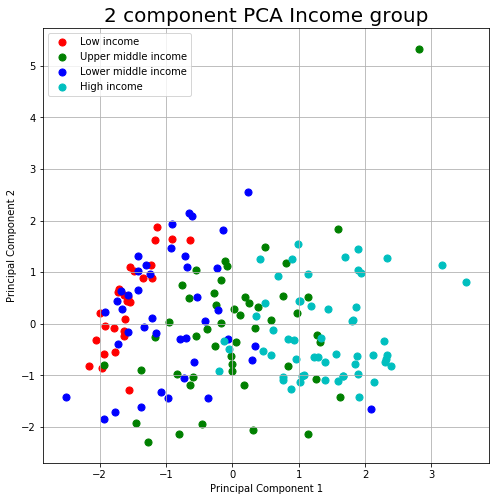

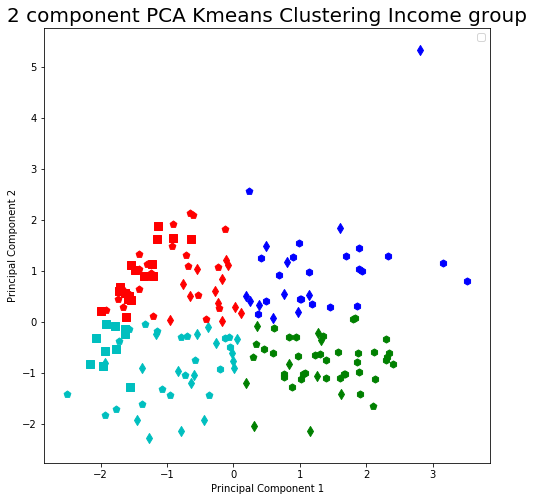

In [34]:
colors_region = ['r', 'g', 'b','c']
pca_plot(colors_region,principalDf_protein_group,"Income group")

income_cluster_labels_protein, income_centers_protein = perform_kmeans(X_protein_group, 4)
principalDf_protein_group["Income group_Cluster"] = income_cluster_labels_protein
mark_shapes = ['s','d','p','h']

pca_kmeans_plot(colors_region,mark_shapes,principalDf_protein_group,"Income group",income_cluster_labels_protein)